# Project | Supervised Learning

# Campaign for selling personal loans


This case is about a bank (Thera Bank) which has a growing customer base. Majority of these
customers are liability customers (depositors) with varying size of deposits. The number of customers
who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this
base rapidly to bring in more loan business and in the process, earn more through the interest on
loans. In particular, the management wants to explore ways of converting its liability customers to
personal loan customers (while retaining them as depositors). A campaign that the bank ran last year
for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the
retail marketing department to devise campaigns with better target marketing to increase the success
ratio with minimal budget.


The department wants to build a model that will help them identify the potential customers who have
higher probability of purchasing the loan. This will increase the success ratio while at the same time
reduce the cost of the campaign.


The file Bank.xls contains data on 5000 customers. The data include customer demographic
information (age, income, etc.), the customer&#39;s relationship with the bank (mortgage, securities
account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among
these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the
earlier campaign.

# Dataset
DataSet-Bank_Personal_Loan_Modelling.csv

Column Descrition - TheraBank_Column_Description.xlsx

# Question 1

Read the column description and ensure you understand each attribute well

In [102]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

import pandas as pd
import numpy as np

import seaborn as sns
sns.set(style="ticks")

# importing ploting libraries
import matplotlib.pyplot as plt  

import warnings
warnings.filterwarnings('ignore')

In [103]:
Thera_df = pd.read_excel('TheraBank_Column_Description.xlsx','Description')
Thera_df[6:20]

,Unnamed: 0,Unnamed: 1,Unnamed: 2
6,NaN,ID,Customer ID
7,NaN,Age,Customer's age in completed years
8,NaN,Experience,#years of professional experience
9,NaN,Income,Annual income of the customer ($000)
10,NaN,ZIPCode,Home Address ZIP code.
11,NaN,Family,Family size of the customer
12,NaN,CCAvg,Avg. spending on credit cards per month ($000)
13,NaN,Education,Education Level. 1: Undergrad; 2: Graduate; 3:...
14,NaN,Mortgage,Value of house mortgage if any. ($000)
15,NaN,Personal Loan,Did this customer accept the personal loan off...


In [104]:
bank_df = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")
print(bank_df.shape)
bank_df.columns

(5000, 14)


Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

# Question 2
Study the data distribution in each attribute, share your findings. (10 points)

In [105]:
bank_df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [106]:
print(bank_df.select_dtypes(exclude=['category',object]).dtypes,'\n')

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object 



In [107]:
bank_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [108]:
if bank_df.isnull().values.any():
    print("There is missing data, check the sample of data to drop")
else:
    print("There is no missing data in the given sample")

There is no missing data in the given sample


### Finding 
* All the attribute are **numerical** and have **non-null** values

In [109]:
#List of attributes 
bank_df.columns.tolist()

['ID',
 'Age',
 'Experience',
 'Income',
 'ZIP Code',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Personal Loan',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard']

In [110]:
bank_df.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


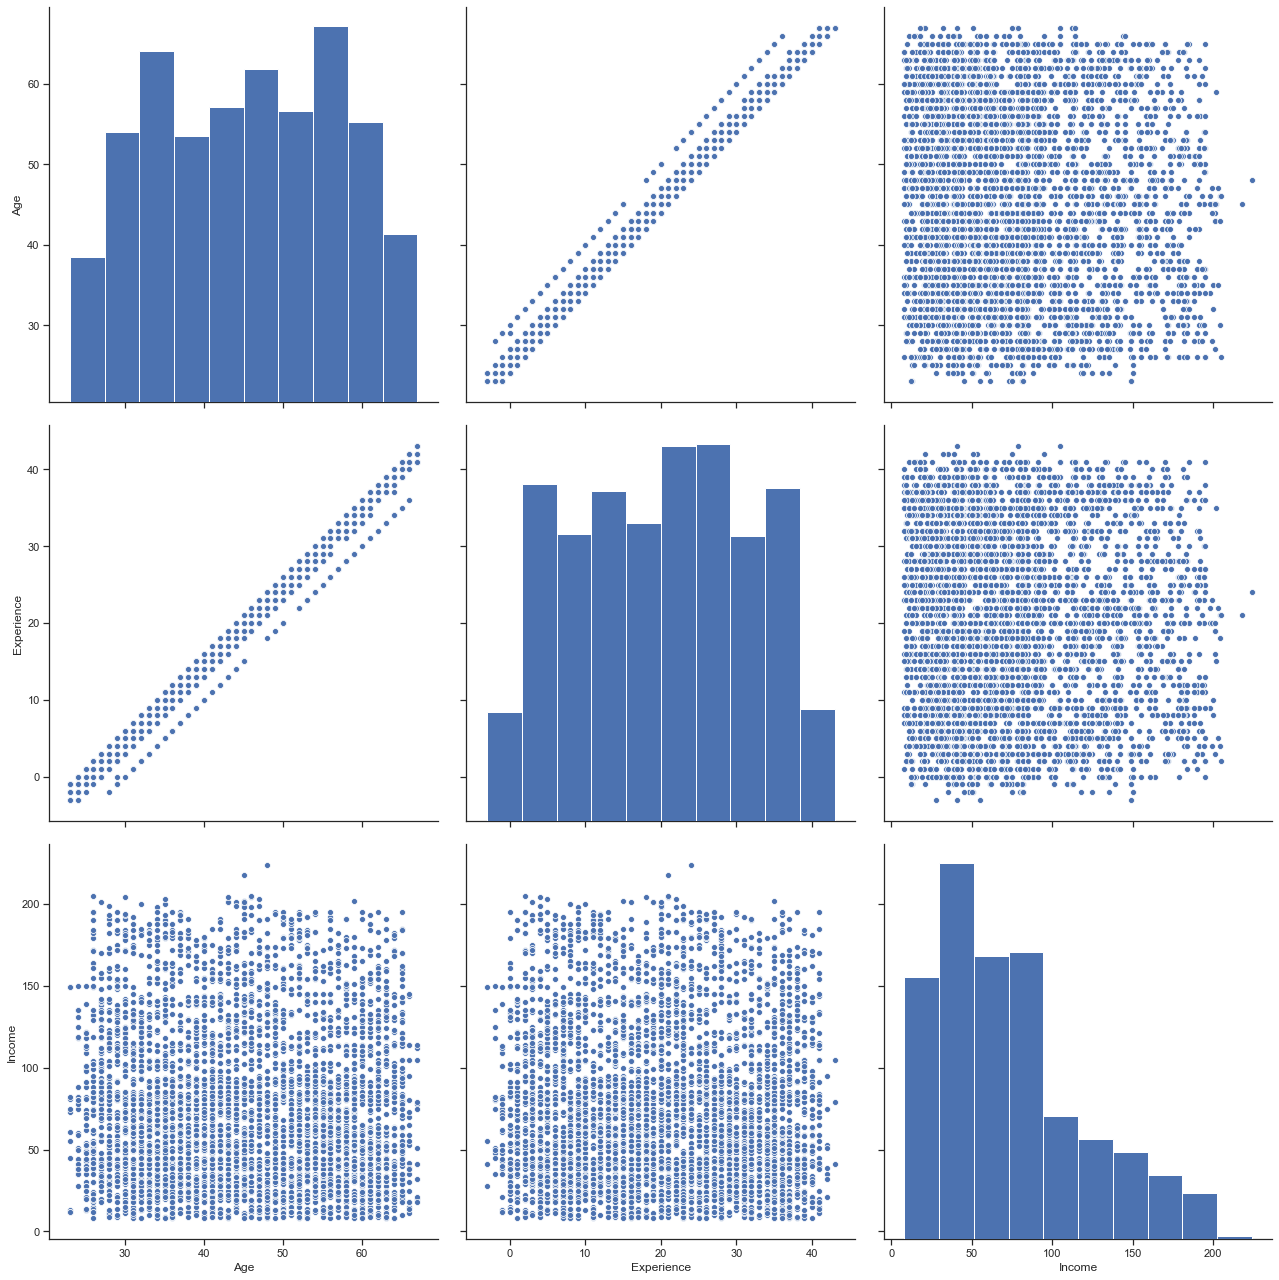

In [111]:
sns.pairplot(data=bank_df[['Age','Experience','Income']],size=6)

### Findings

**Age** - feature is distributed between 23 years and 67 years of age. Mean is almost equal to median

**Experience** can not be negative and **requires data cleaning**. The mean is almost equal to median.

**Annual income** is positively skewed, mean is greater than the median.


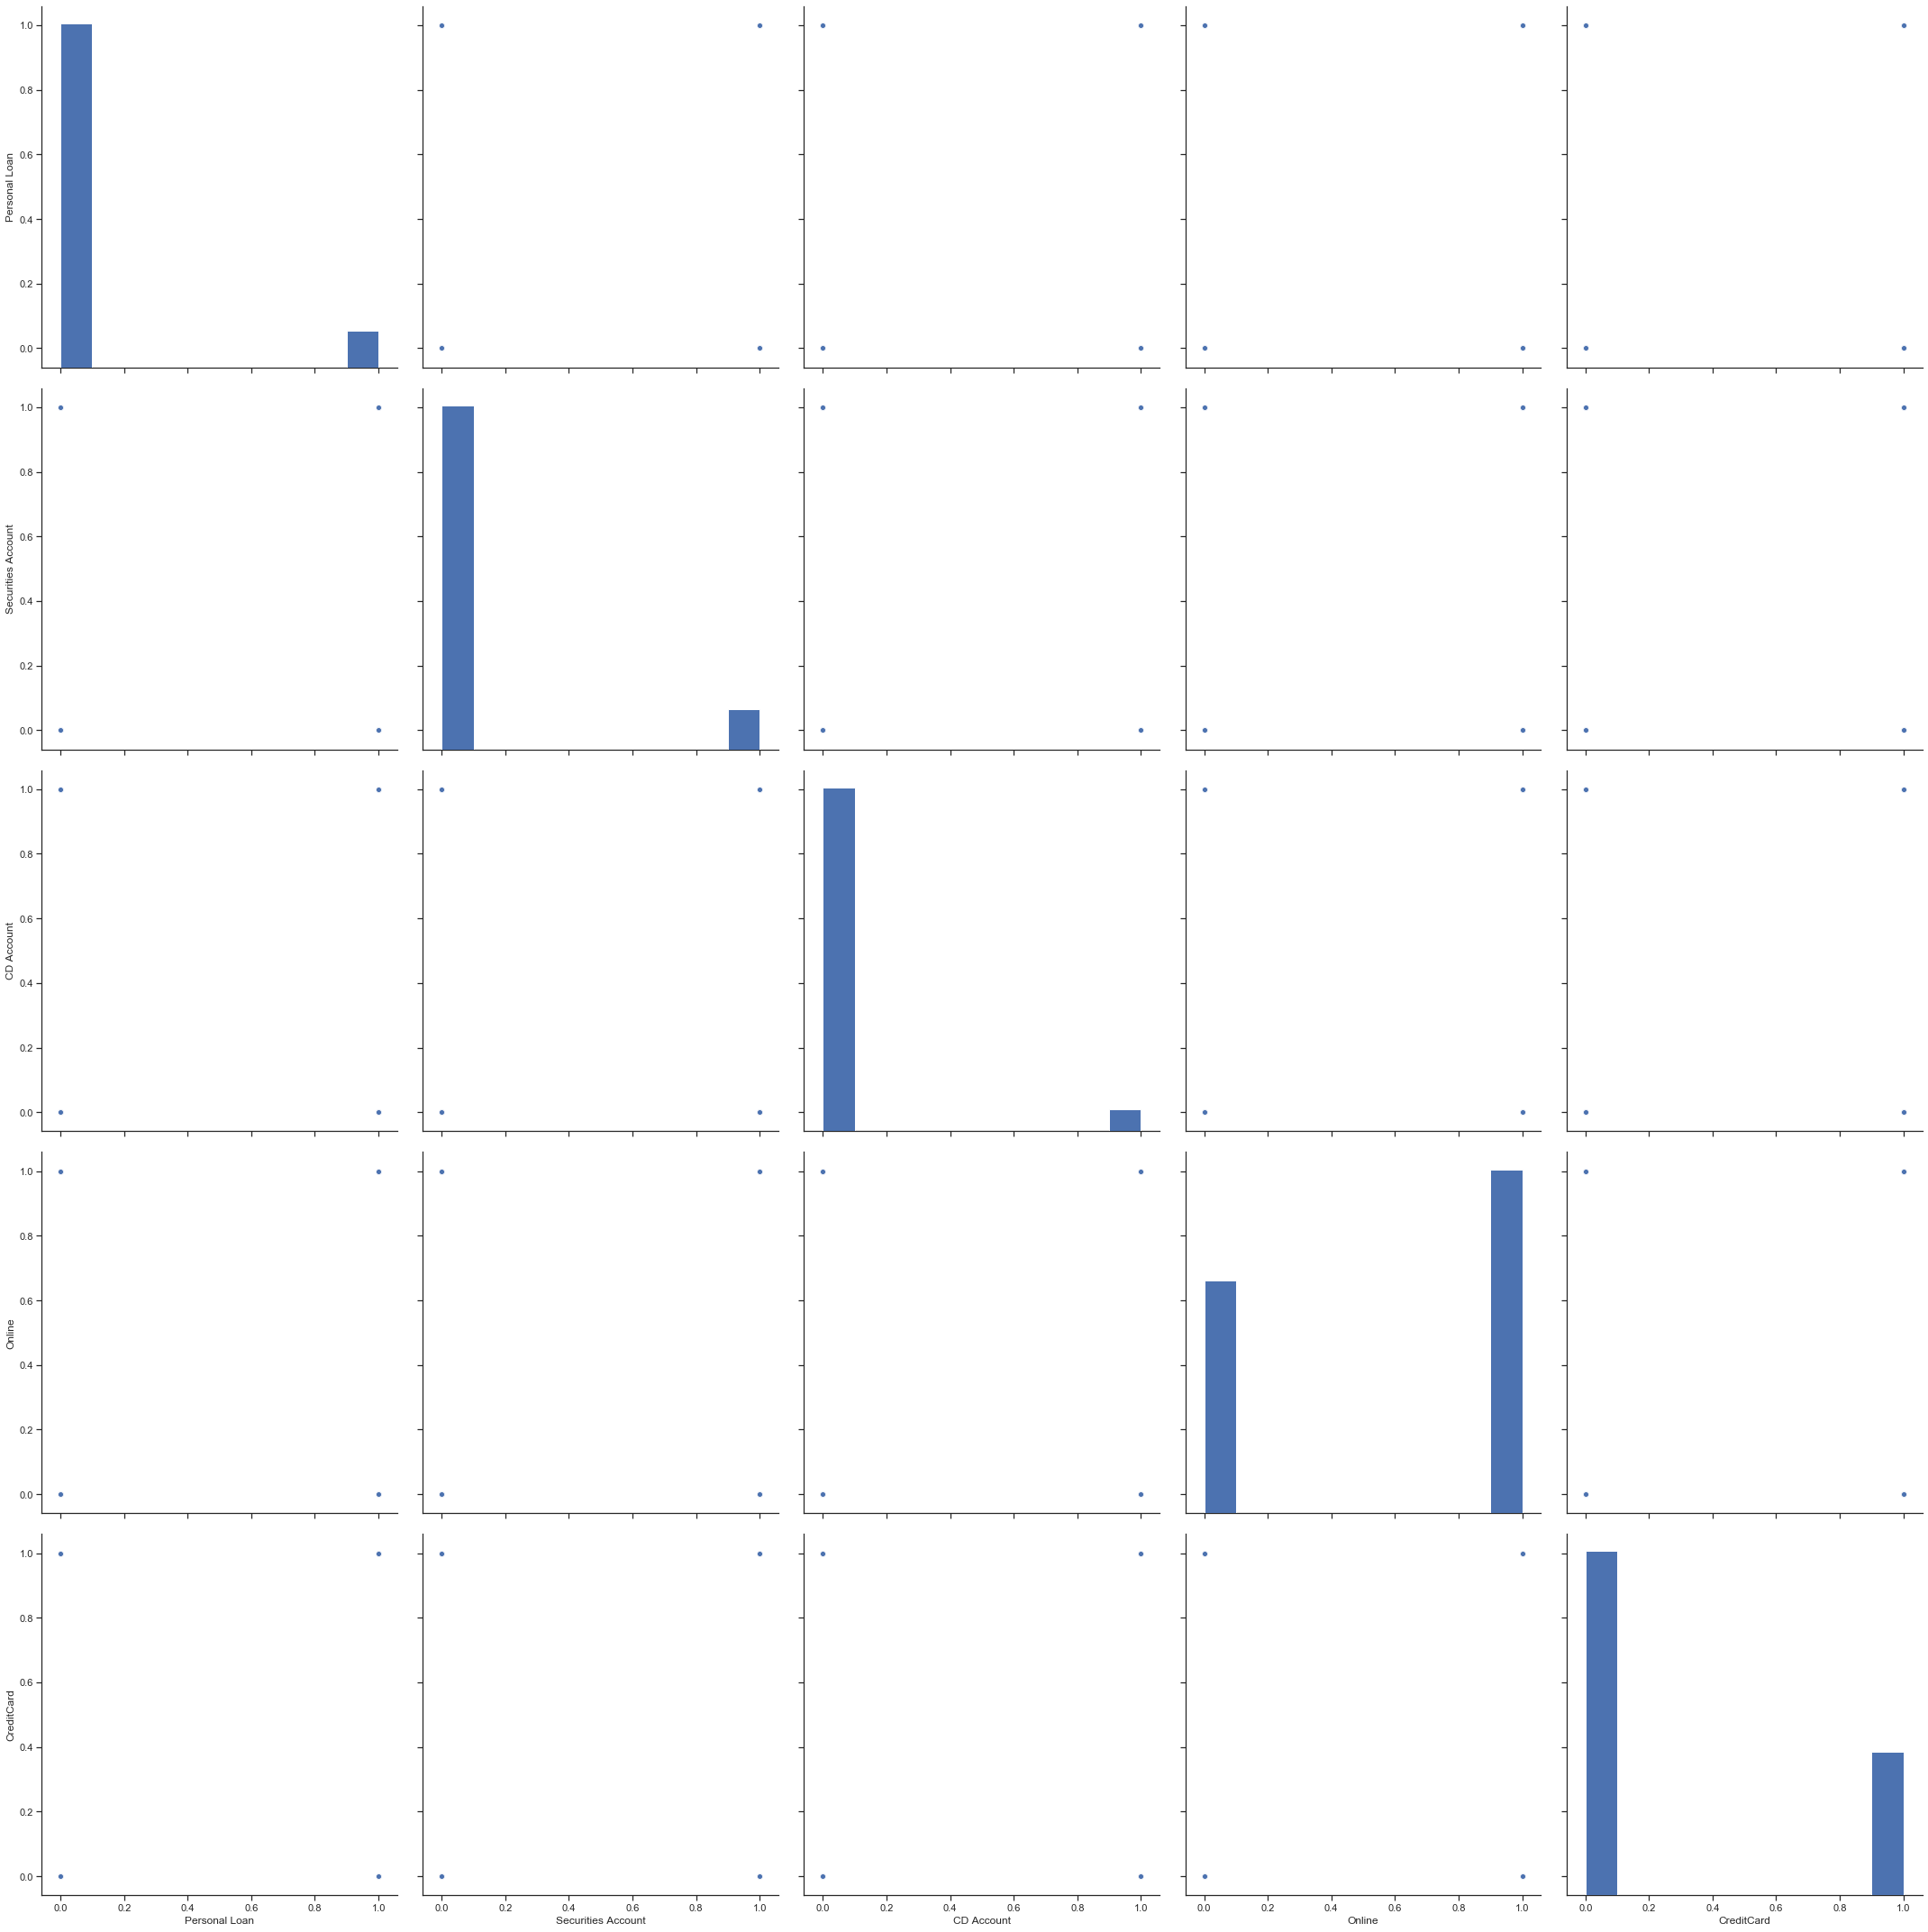

In [112]:
sns.pairplot(data=bank_df[['Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']],size=6)

### Findings
Above showns are 5 **"binary category"** Arttibutes: 
- Personal Loan, 
- Securities Account, 
- CD Account, 
- Online, 
- Credit Card

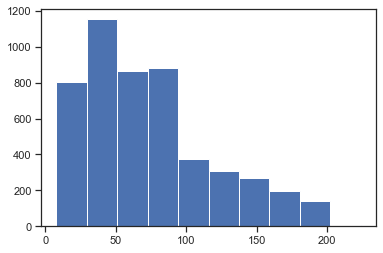

In [113]:
plt.hist(bank_df['Income'])
plt.show()

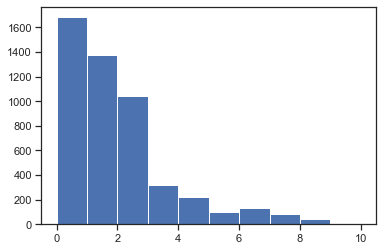

In [114]:
plt.hist(bank_df['CCAvg'])
plt.show()

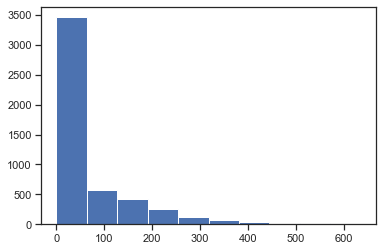

In [115]:
plt.hist(bank_df['Mortgage'])
plt.show()

### Findings
- **Income** is positively skewed, the mean is greater than the median
- **CCAvg**(Average credit card spending) is positively skewed, customer spends around 2.5K
- **Mortgage** 70% of the individuals have a mortgage of less than 40K. However the max value is 635K

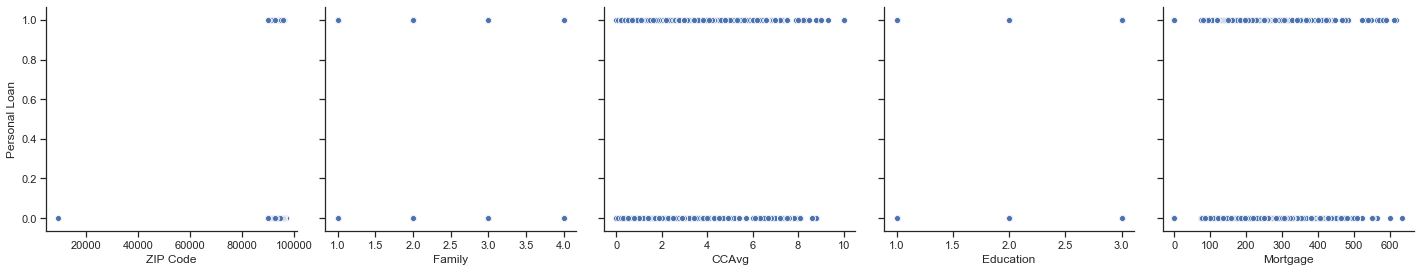

In [116]:
sns.pairplot(data=bank_df, y_vars=['Personal Loan'], x_vars=['ZIP Code','Family', 'CCAvg', 'Education', 'Mortgage'],size=4)

## Features Vs Target

In [117]:
bank_df.groupby(["Personal Loan"]).count()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


#### CCavg Vs Personal Loan

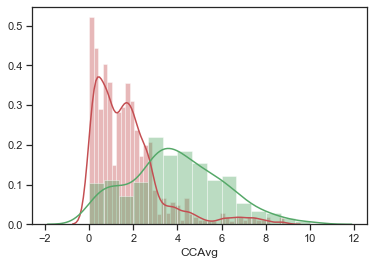

In [118]:
CCAvg_no= bank_df[bank_df['Personal Loan'] == 0]['CCAvg']
CCAvg_yes = bank_df[bank_df['Personal Loan'] == 1]['CCAvg']
sns.distplot(CCAvg_no,color = 'r');
sns.distplot(CCAvg_yes,color = 'g');

In [119]:
CCAvg = bank_df.groupby(['Personal Loan','CCAvg']).size()
print('Average credit card spending of',CCAvg_no.median(),'k dollars from',CCAvg[0].sum(),'no. of customers who did not take loan')
print('Average credit card spending of',CCAvg_yes.median(),'k dollars from',CCAvg[1].sum(),'no. of customers who took personal loan')
      

Average credit card spending of 1.4 k dollars from 4520 no. of customers who did not take loan
Average credit card spending of 3.8 k dollars from 480 no. of customers who took personal loan


### Findings

Customers who have taken personal loan have spent higher credit card average. Customers who spend more on Credit card are more likely to take personal loans than customers who spend less on credit cards.

####  Family Vs Personal Loan

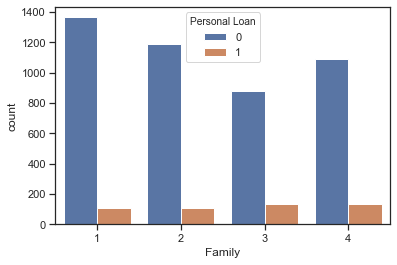

In [120]:
sns.countplot(x='Family',hue='Personal Loan',data=bank_df)

In [121]:
Family = bank_df.groupby(['Personal Loan','Family']).size()
print(Family)
print('\n\n')
print('Number of customer who took personal loan with the Family size:')
print(Family[1])

Personal Loan  Family
0              1         1365
               2         1190
               3          877
               4         1088
1              1          107
               2          106
               3          133
               4          134
dtype: int64



Number of customer who took personal loan with the Family size:
Family
1    107
2    106
3    133
4    134
dtype: int64


### Finding
- **Family size** does not have corelation with personal loan.

#### Securities Account Vs Personal Loan

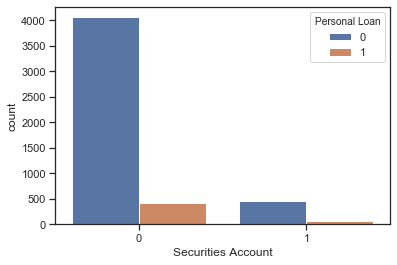

In [122]:
sns.countplot(x='Securities Account',hue='Personal Loan', data=bank_df)

In [123]:
SA = bank_df.groupby(['Personal Loan','Securities Account']).size()
print(SA)


Personal Loan  Securities Account
0              0                     4058
               1                      462
1              0                      420
               1                       60
dtype: int64


### Finding
Majority of the customer who **does not have**  **Securities Account** with the bank are **4058** have not taken personal loan from the bank. 

Out of **522** (462+60) customers who have Securities Account with bank, only **60** people have taken personal loan from the bank, i.e. **only ~11% of Securities Account holders have taken personal loan from the bank**. 


#### CD Account Vs Personal Loan

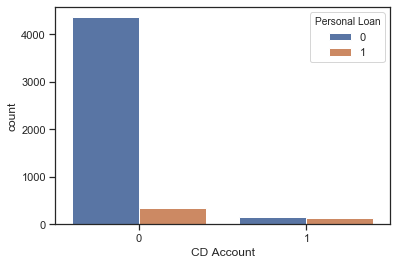

In [124]:
sns.countplot(x='CD Account',hue='Personal Loan', data=bank_df)

In [125]:
CD = bank_df.groupby(['Personal Loan','CD Account']).size()
print(CD)


Personal Loan  CD Account
0              0             4358
               1              162
1              0              340
               1              140
dtype: int64


### Finding

Majority of the customer who **does not have** certificate of deposit **(CD)** with the bank are **4358** have not taken personal loan from the bank. 

Out of **304** (16+140) customers who have CD with bank **140** people have taken personal loan from the bank, i.e. **~46% of CD holders have taken personal loan from the bank**. 

#### Education Vs Income 

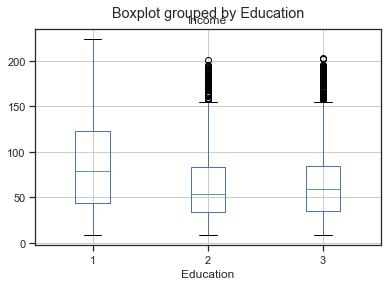

In [126]:
#Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
bank_df.boxplot(column='Income', by = 'Education')

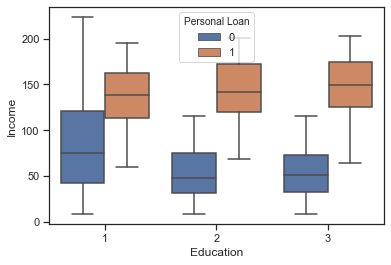

In [127]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=bank_df)

### Finding
In crease in Level of education does not have does not influence much on average income. 
**Personal loan taken at all Levels of Education are of same income group**.

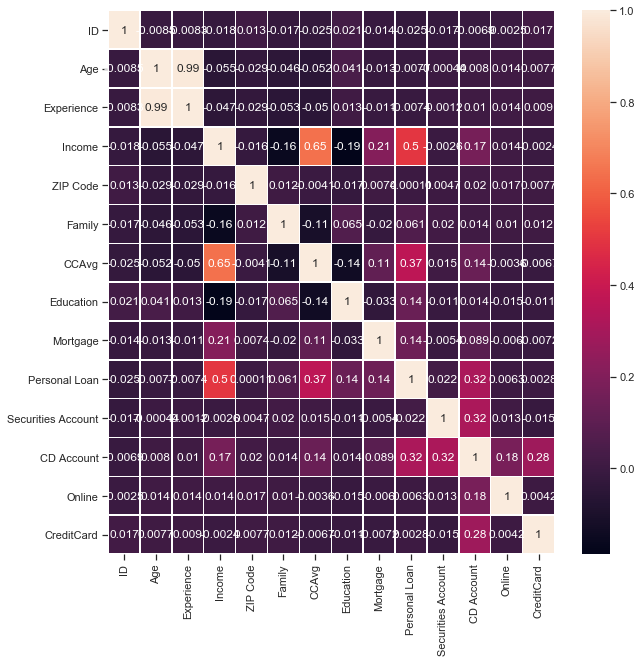

In [128]:
fig, ax = plt.subplots(figsize=(10,10))       
sns.heatmap(bank_df.corr(),annot=True, linewidths=.5, ax=ax)

### Findings

- Income, CCAvg, and CD account are moderately correlated with Personal Loan
- Features which are highhly correlated with each other are age and Experience

# Question 3
Get the target column distribution. 


- **Personal Loan is target variable**

                 ID   Age  Experience  Income  ZIP Code  Family  CCAvg  \
Personal Loan                                                            
0              4520  4520        4520    4520      4520    4520   4520   
1               480   480         480     480       480     480    480   

               Education  Mortgage  Securities Account  CD Account  Online  \
Personal Loan                                                                
0                   4520      4520                4520        4520    4520   
1                    480       480                 480         480     480   

               CreditCard  
Personal Loan              
0                    4520  
1                     480  


AxesSubplot(0.125,0.125;0.775x0.755)


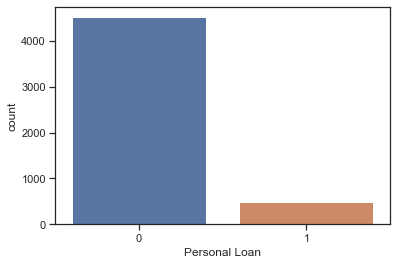

In [129]:
print(bank_df.groupby(["Personal Loan"]).count())
print('\n')
print(sns.countplot(x="Personal Loan", data=bank_df))

### Finding

Number of customers who have taken personal loan are **480** and  no. of customers who did not take personal loan from bank are **4520**

# Data Cleaning

### The Customers with Negative experience 

In [130]:
print(bank_df[bank_df['Experience'] < 0]['Experience'])

89     -1
226    -1
315    -2
451    -2
524    -1
536    -1
540    -1
576    -1
583    -1
597    -2
649    -1
670    -1
686    -1
793    -2
889    -2
909    -1
1173   -1
1428   -1
1522   -1
1905   -1
2102   -1
2430   -1
2466   -2
2545   -1
2618   -3
2717   -2
2848   -1
2876   -2
2962   -2
2980   -1
3076   -1
3130   -2
3157   -1
3279   -1
3284   -1
3292   -1
3394   -1
3425   -1
3626   -3
3796   -2
3824   -1
3887   -2
3946   -1
4015   -1
4088   -1
4116   -2
4285   -3
4411   -2
4481   -2
4514   -3
4582   -1
4957   -1
Name: Experience, dtype: int64


### Total number of customers with Negative Experience 

In [131]:
bank_df[bank_df['Experience'] < 0]['Experience'].count()

52

### Customer with negative experience and their Age 

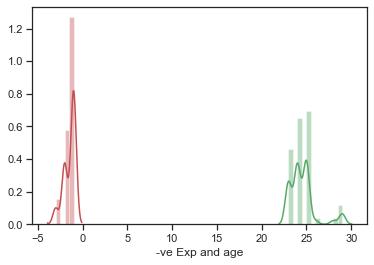

In [132]:
neg_exp = bank_df[bank_df['Experience'] < 0]['Experience']
negEx_age = bank_df[bank_df['Experience'] < 0]['Age']
nx = pd.Series(neg_exp, name="Negative Exp")
nx_age = pd.Series(negEx_age, name="-ve Exp and age")

sns.distplot(nx,color = 'r')
sns.distplot(nx_age,color = 'g')


### IDs of customer with Negative and Positive Experience

In [133]:
IDs_Neg_Ex = bank_df.loc[bank_df['Experience'] < 0]['ID'].tolist()
print(IDs_Neg_Ex)
PosEx_df = bank_df.loc[bank_df['Experience'] > 0]
print("\n\n",PosEx_df)

[90, 227, 316, 452, 525, 537, 541, 577, 584, 598, 650, 671, 687, 794, 890, 910, 1174, 1429, 1523, 1906, 2103, 2431, 2467, 2546, 2619, 2718, 2849, 2877, 2963, 2981, 3077, 3131, 3158, 3280, 3285, 3293, 3395, 3426, 3627, 3797, 3825, 3888, 3947, 4016, 4089, 4117, 4286, 4412, 4482, 4515, 4583, 4958]


         ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4   1.60          1   
1        2   45          19      34     90089       3   1.50          1   
2        3   39          15      11     94720       1   1.00          1   
3        4   35           9     100     94112       1   2.70          2   
4        5   35           8      45     91330       4   1.00          2   
5        6   37          13      29     92121       4   0.40          2   
6        7   53          27      72     91711       2   1.50          2   
7        8   50          24      22     93943       1   0.30          3   
8        9   35          1

### Replacing the Negative Experience with Median of Experience of Customers with same Age and Education

In [134]:
for neg_id in IDs_Neg_Ex:
    AGE = bank_df.loc[np.where(bank_df['ID']==neg_id)]["Age"].tolist()[0]
    EDU = bank_df.loc[np.where(bank_df['ID']==neg_id)]["Education"].tolist()[0]
    PosAgeExp_df = PosEx_df[(PosEx_df.Age == AGE) & (PosEx_df.Education == EDU)]
    PosExp_Med = PosAgeExp_df['Experience'].median()
    print(PosExp_Med)
    bank_df.loc[bank_df.loc[np.where(bank_df['ID']==neg_id)].index, 'Experience'] = PosExp_Med

1.0
nan
nan
3.0
nan
1.0
1.0
1.0
nan
nan
1.0
nan
nan
nan
nan
nan
nan
1.0
1.0
1.0
1.0
nan
nan
1.0
nan
nan
nan
nan
nan
1.0
3.0
nan
nan
1.0
1.0
1.0
1.0
nan
nan
nan
nan
nan
1.0
1.0
3.0
nan
nan
nan
1.0
nan
1.0
3.0


### Negative Experience after cleaning of data

In [135]:
bank_df[bank_df['Experience'] < 0]['Experience'].count()  

0

#### Finding 
We have also introduced NaN in experience as show above 

### Missing Values and replaning NaN with zero

In [136]:
print("There are",bank_df.isnull().sum().sum()," missing values in data\n")
      
col_mask=bank_df.isnull().any(axis=0) 
row_mask=bank_df.isnull().any(axis=1)
print("Below are the missing values in data\n", bank_df.loc[row_mask,col_mask])

There are 29  missing values in data

Below are the missing values in data
       Experience
226          NaN
315          NaN
524          NaN
583          NaN
597          NaN
670          NaN
686          NaN
793          NaN
889          NaN
909          NaN
1173         NaN
2430         NaN
2466         NaN
2618         NaN
2717         NaN
2848         NaN
2876         NaN
2962         NaN
3130         NaN
3157         NaN
3425         NaN
3626         NaN
3796         NaN
3824         NaN
3887         NaN
4116         NaN
4285         NaN
4411         NaN
4514         NaN


In [137]:
bank_df['Experience'].fillna(0, inplace=True)
print("There are",bank_df.isnull().sum().sum()," missing values in data\n")

There are 0  missing values in data



In [138]:
bank_df.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.125800,11.430053,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### Finding 

No customer with negative experience 

# Question 4
Split the data into training and test set in the ratio of 70:30 respectively

In [139]:
bank_df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1.0,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19.0,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15.0,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9.0,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8.0,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13.0,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27.0,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24.0,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10.0,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9.0,180,93023,1,8.9,3,0,1,0,0,0,0


### Slice data set for Independent variables and dependent variable
#### Please note 'Personal Loan' is the dependent variable, name it y_ and independent set data as X_

In [140]:
X_df=bank_df.drop(['ID','ZIP Code','Personal Loan'] , axis = 1)
print(X_df.head())
X_ =X_df.values # independent variables
print("\n\n",X_)

   Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0   25         1.0      49       4    1.6          1         0   
1   45        19.0      34       3    1.5          1         0   
2   39        15.0      11       1    1.0          1         0   
3   35         9.0     100       1    2.7          2         0   
4   35         8.0      45       4    1.0          2         0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1  


 [[25.  1. 49. ...  0.  0.  0.]
 [45. 19. 34. ...  0.  0.  0.]
 [39. 15. 11. ...  0.  0.  0.]
 ...
 [63. 39. 24. ...  0.  0.  0.]
 [65. 40. 49. ...  0.  1.  0.]
 [28.  4. 83. ...  0.  1.  1.]]


In [141]:
Y_df=bank_df["Personal Loan"]
print(Y_df.head(10))
y_=Y_df.values  # dependent variable
print("\n\n",y_,"size",len(y_))

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    1
Name: Personal Loan, dtype: int64


 [0 0 0 ... 0 0 0] size 5000


### Split data in Training and Testing in 70:30

In [142]:
from sklearn.model_selection import train_test_split
test_size = 0.30 # taking 70:30 training and test set
seed = 82  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=test_size, random_state=seed)
print(X_.shape,y_.shape)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5000, 11) (5000,)
(3500, 11) (1500, 11) (3500,) (1500,)


### Feature Scaling

In [143]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

# Question 5
Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a
liability customer buying personal loans (30 points)

## Logistic Regression 

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  confusion_matrix
# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [150]:
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)
y_predict = model_LR.predict(X_test)
model_score = model_LR.score(X_test, y_test)
print("Accuracy of logistic regression classifier on test set:")
print(model_score)

Accuracy of logistic regression classifier on test set:
0.948


In [151]:
cm_LR = confusion_matrix(y_test, y_predict)
print(cm_LR)

[[1327   32]
 [  46   95]]


In [179]:
from sklearn.metrics import classification_report
cr_LR = classification_report(y_test, y_predict)
print(cr_LR)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1359
           1       0.75      0.67      0.71       141

    accuracy                           0.95      1500
   macro avg       0.86      0.83      0.84      1500
weighted avg       0.95      0.95      0.95      1500



## K - Nearest Neighbour (K-NN)

In [153]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=100, metric='euclidean')  
classifier.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                     weights='uniform')

In [154]:
y_pred = classifier.predict(X_test)  
print(y_pred)

[0 0 0 ... 0 0 0]


In [155]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[1359    0]
 [ 114   27]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1359
           1       1.00      0.19      0.32       141

    accuracy                           0.92      1500
   macro avg       0.96      0.60      0.64      1500
weighted avg       0.93      0.92      0.90      1500



In [156]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.924

In [157]:
y_test_np=np.asarray(y_test)

In [158]:
error = []

# Calculating error for K values between 1 and 80
for i in range(1, 80):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test_np))

In [159]:
print(error)

[0.044, 0.04066666666666666, 0.04066666666666666, 0.03933333333333333, 0.037333333333333336, 0.042, 0.03666666666666667, 0.042666666666666665, 0.042, 0.042666666666666665, 0.03933333333333333, 0.042, 0.04133333333333333, 0.044, 0.04066666666666666, 0.046, 0.043333333333333335, 0.050666666666666665, 0.04733333333333333, 0.051333333333333335, 0.04933333333333333, 0.05266666666666667, 0.048, 0.052, 0.050666666666666665, 0.05266666666666667, 0.05266666666666667, 0.056, 0.054, 0.058, 0.056, 0.06066666666666667, 0.056666666666666664, 0.058666666666666666, 0.058, 0.059333333333333335, 0.056666666666666664, 0.059333333333333335, 0.05733333333333333, 0.06, 0.058, 0.06066666666666667, 0.058666666666666666, 0.062, 0.06066666666666667, 0.06333333333333334, 0.06266666666666666, 0.06333333333333334, 0.062, 0.062, 0.06266666666666666, 0.06333333333333334, 0.06133333333333333, 0.06333333333333334, 0.06133333333333333, 0.064, 0.06266666666666666, 0.06733333333333333, 0.06533333333333333, 0.067333333333

Text(0, 0.5, 'Mean Error')

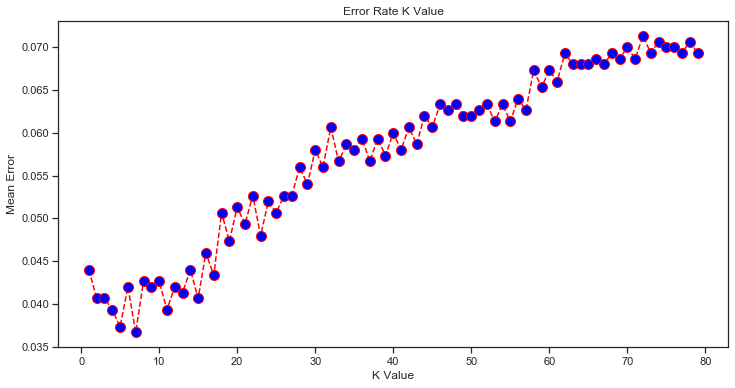

In [160]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 80), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 

### At K=7 the Mean Error is very less so we can use it in n_neighbors

In [161]:
model_KNN = KNeighborsClassifier(n_neighbors=7)  
model_KNN.fit(X_train, y_train) 
y_pred1 = model_KNN.predict(X_test)
print(y_pred1)

[0 0 0 ... 0 0 0]


In [180]:
cm_KNN = confusion_matrix(y_test, y_pred1)
print(cm_KNN) 
print("\n\n")
cr_KNN = classification_report(y_test, y_pred1)
print(cr_KNN)  
print("\n\n")
print(accuracy_score(y_test, y_pred1))

[[1354    5]
 [  50   91]]



              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1359
           1       0.95      0.65      0.77       141

    accuracy                           0.96      1500
   macro avg       0.96      0.82      0.87      1500
weighted avg       0.96      0.96      0.96      1500




0.9633333333333334


## Naive Bayes Clasification

In [163]:
from sklearn.naive_bayes import GaussianNB
model_NB = GaussianNB() # Invoking the NB Gaussian function to create the model
model_NB.fit(X_train, y_train) # fitting the model in the training data set

GaussianNB(priors=None, var_smoothing=1e-09)

In [164]:
# Predicting the Test set results
expected = y_test
predicted = model_NB.predict(X_test)
print(predicted)

[0 0 0 ... 1 0 1]


In [165]:
#lets see the actual and predicted value side by side
y_compare = np.vstack((expected,predicted)).T
#actual value on the left side and predicted value on the right hand side
#printing the top 20 values
y_compare[:20,:]

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0]], dtype=int64)

In [166]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_NB = confusion_matrix(expected, predicted)
print(cm_NB)

[[1235  124]
 [  51   90]]


In [181]:
# summarize the fit of the model
cr_NB=metrics.classification_report(expected, predicted)
print(cr_NB)

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1359
           1       0.42      0.64      0.51       141

    accuracy                           0.88      1500
   macro avg       0.69      0.77      0.72      1500
weighted avg       0.91      0.88      0.89      1500



# Question 6
Print the confusion matrix for all the above models 

#### Logistic Regression Confusion Matrix

In [168]:
print("The Confussion Matrix for Logistic Regression is: ")
print(cm_LR)

The Confussion Matrix for Logistic Regression is: 
[[1327   32]
 [  46   95]]


In [169]:
#finding accuracy from the confusion matrix.
a = cm_LR.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm_LR[row,c]
        else:
            falsePred += cm_LR[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\nAccuracy of the Logistic Regression is: ', corrPred/(cm_LR.sum()))

Correct predictions:  1422
False predictions 78

Accuracy of the Logistic Regression is:  0.948


#### K - Nearest NeighbourConfusion Matrix

In [170]:
print("The Confussion Matrix for K-Nearest Neighbour is: ")
print(cm_KNN)

The Confussion Matrix for K-Nearest Neighbour is: 
[[1354    5]
 [  50   91]]


In [171]:
#finding accuracy from the confusion matrix.
a = cm_KNN.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm_KNN[row,c]
        else:
            falsePred += cm_KNN[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\nAccuracy of the K-Nearest Neighbour is: ', corrPred/(cm_KNN.sum()))

Correct predictions:  1445
False predictions 55

Accuracy of the K-Nearest Neighbour is:  0.9633333333333334


#### Naive Bayes Clasification

In [172]:
print("The Confussion Matrix for Naive Bayes is: ")
print(cm_NB)

The Confussion Matrix for Naive Bayes is: 
[[1235  124]
 [  51   90]]


In [173]:
#finding accuracy from the confusion matrix.
a = cm_NB.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm_NB[row,c]
        else:
            falsePred += cm_NB[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\nAccuracy of the Naive Bayes Clasification is: ', corrPred/(cm_NB.sum()))

Correct predictions:  1325
False predictions 175

Accuracy of the Naive Bayes Clasification is:  0.8833333333333333


# Question 7
Give your reasoning on which is the best model in this case and why it performs better? (10 points)

In [174]:
from sklearn.model_selection import cross_val_score

In [175]:
# prepare configuration for cross validation test harness
seed = 9
# prepare models
models = []
models.append(('Logistic Regression', model_LR))
models.append(('K-Nearest Neighbour', model_KNN))
models.append(('Naive Bayes Clasification', model_NB))

In [176]:
from sklearn.model_selection import KFold

# evaluate each model in turn

all_results = []
Model_Names = []
for mod_name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    crossValidation_results = cross_val_score(model, X_, y_, cv=kfold, scoring='accuracy')
    all_results.append(crossValidation_results)
    Model_Names.append(mod_name)
    msg = "Accuracy of %s: Mean Score %0.4f and Standard Deviation of (+/-) %0.4f" % (mod_name, crossValidation_results.mean(), crossValidation_results.std())
    print(msg)

Accuracy of Logistic Regression: Mean Score 0.9500 and Standard Deviation of (+/-) 0.0064
Accuracy of K-Nearest Neighbour: Mean Score 0.9112 and Standard Deviation of (+/-) 0.0110
Accuracy of Naive Bayes Clasification: Mean Score 0.8832 and Standard Deviation of (+/-) 0.0115


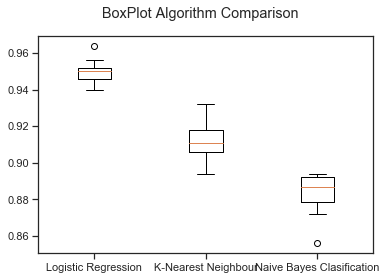

In [177]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('BoxPlot Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(all_results)
ax.set_xticklabels(Model_Names)
plt.show()

In [187]:
print("classification_report of Logistic Regression")
print(cr_LR)
print("\nclassification_report of KNN\n")
print(cr_KNN)
print("\nclassification_report of Naive Bayes\n")
print(cr_NB)

classification_report of Logistic Regression
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1359
           1       0.75      0.67      0.71       141

    accuracy                           0.95      1500
   macro avg       0.86      0.83      0.84      1500
weighted avg       0.95      0.95      0.95      1500


classification_report of KNN

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1359
           1       0.95      0.65      0.77       141

    accuracy                           0.96      1500
   macro avg       0.96      0.82      0.87      1500
weighted avg       0.96      0.96      0.96      1500


classification_report of Naive Bayes

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1359
           1       0.42      0.64      0.51       141

    accuracy                           0.88      1500
   macro avg 

# The best model which can be used is Logistic regression as the precision and recall are close to each other does not vary much. Mean Accuracy Score is is highest and standard deviation is lowest.